# Étape 5 : Interprétation et Visualisation des Vulnérabilités

Nous allons utiliser le DataFrame `df` déjà présent en mémoire pour explorer et visualiser les vulnérabilités.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# df doit déjà être défini dans l'environnement
import pandas as pd
df = pd.read_csv('consolidated_anssi_cve.csv', dtype=str)

df['Type_encoded'] = df['Type'].map({'Avis': 0, 'Alerte': 1})
df.head(5)

,ID ANSSI,Titre ANSSI,Type,Date,CVE,CVSS,Base Severity,CWE,CWE Description,EPSS,Lien,Description,Éditeur,Produit,Versions affectées,Type_encoded
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,Avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-4128,3.1,LOW,CWE-863,CWE-863: Incorrect Authorization,0.00023,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",Mattermost,Mattermost,"10.5.0, 9.11.0",0
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,Avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-4573,4.1,MEDIUM,CWE-90,CWE-90: Improper Neutralization of Special Ele...,0.00028,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",Mattermost,Mattermost,"10.7.0, 10.6.0, 10.5.0, 9.11.0",0
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,Avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-43003,6.4,MEDIUM,CWE-749,CWE-749: Exposed Dangerous Method or Function,0.00053,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP S/4 HANA allows an authenticated attacker ...,SAP_SE,SAP S/4HANA (Private Cloud & On-Premise),"S4CRM 204, 205, 206, S4CEXT 107, 108, BBPCRM 7...",0
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,Avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-43007,6.3,MEDIUM,CWE-862,CWE-862: Missing Authorization,0.00044,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP Service Parts Management (SPM) does not pe...,SAP_SE,SAP Service Parts Management (SPM),"SAP_APPL 617, 618, S4CORE 100, 101, 102, 103",0
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,Avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-23191,3.1,LOW,CWE-644,CWE-644: Improper Neutralization of HTTP Heade...,0.0005,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Cached values belonging to the SAP OData endpo...,SAP_SE,SAP Fiori for SAP ERP,"SAP_GWFND 740, 750, 751, 752, 753, 754, 755, 7...",0


## 1. Histogramme des scores CVSS



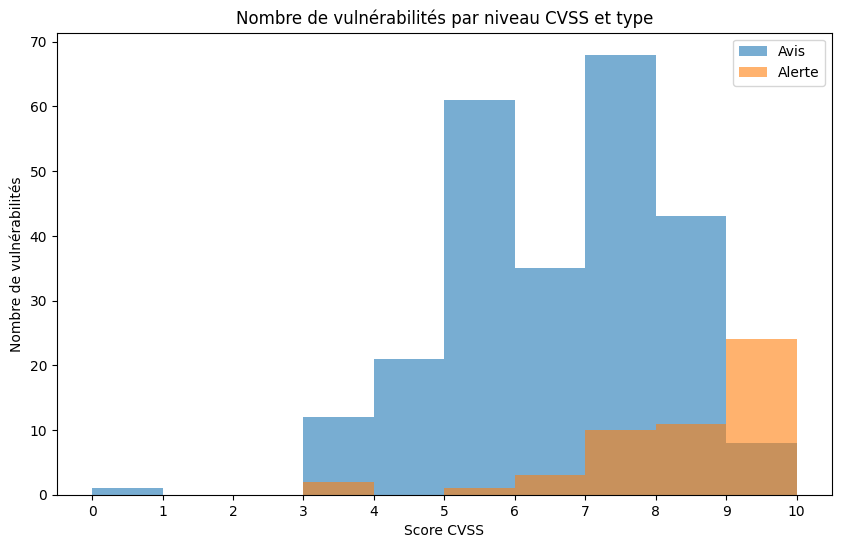

In [ ]:
# Histogramme du nombre de vulnérabilités par niveau CVSS et par type (type_encoded)
plt.figure(figsize=(10,6))
bins = range(0, 11)  # CVSS de 0 à 10

# Convertir CVSS en float pour éviter erreur de type
df['CVSS'] = pd.to_numeric(df['CVSS'], errors='coerce')

for tval, label in zip([0, 1], ['Avis', 'Alerte']):
    subset = df[df['Type_encoded'] == tval]
    plt.hist(subset['CVSS'].dropna(), bins=bins, alpha=0.6, label=label)
plt.title('Nombre de vulnérabilités par niveau CVSS et type')
plt.xlabel('Score CVSS')
plt.ylabel('Nombre de vulnérabilités')
plt.legend()
plt.xticks(bins)
plt.show()

Le graphe montre que les alertes sont moins courantes, mais représentent un plus grand rique que les avis. Cependant, la majorité des avis ont une criticité dépassant 5/10.

## 2. Diagramme circulaire des types de vulnérabilités (CWE)

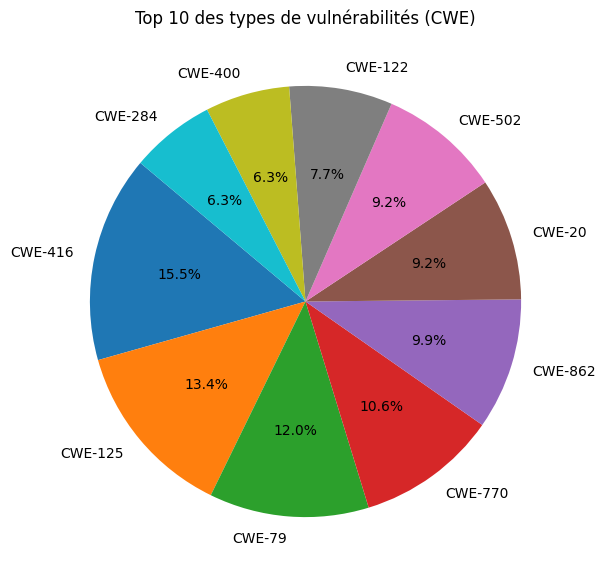

In [ ]:
df_temp = df.copy()
df_cwe = df_temp[df_temp['CWE'].notna() & (df_temp['CWE'] != '') & (df_temp['CWE'] != 'Non disponible')]
cwe_counts = df_cwe['CWE'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(cwe_counts, labels=cwe_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 des types de vulnérabilités (CWE)')
plt.show()

## 3. Courbe des scores EPSS (logarithmique)

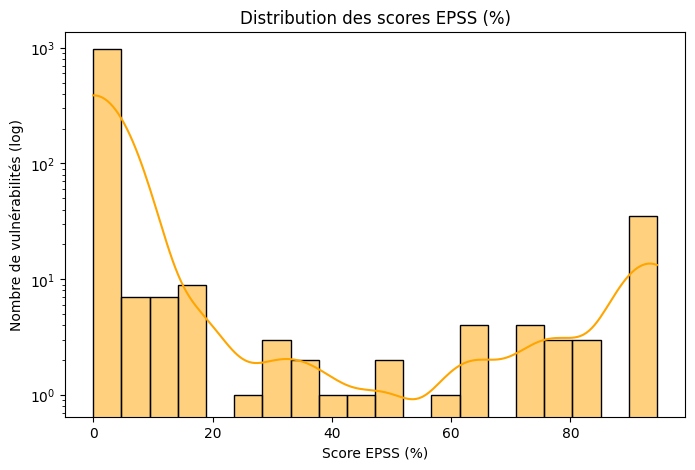

In [ ]:
epss_percent = df['EPSS'].dropna().astype(float) * 100
plt.figure(figsize=(8,5))
sns.histplot(epss_percent, bins=20, kde=True, color='orange')
plt.yscale('log')
plt.title('Distribution des scores EPSS (%)')
plt.xlabel('Score EPSS (%)')
plt.ylabel('Nombre de vulnérabilités (log)')
plt.show()

Il est important de noté que le nombre de vulnérabilité est ici sur une échelle logarithmique. Une écrasante majorité des vulnérabilités ont donc très peu de chance d'être exploitée.

## 4. Classement des produits les plus affectés

C:\Users\maxim\AppData\Local\Temp\ipykernel_21044\3858725932.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_Produits_df, x='count', y='Produit', palette='viridis')


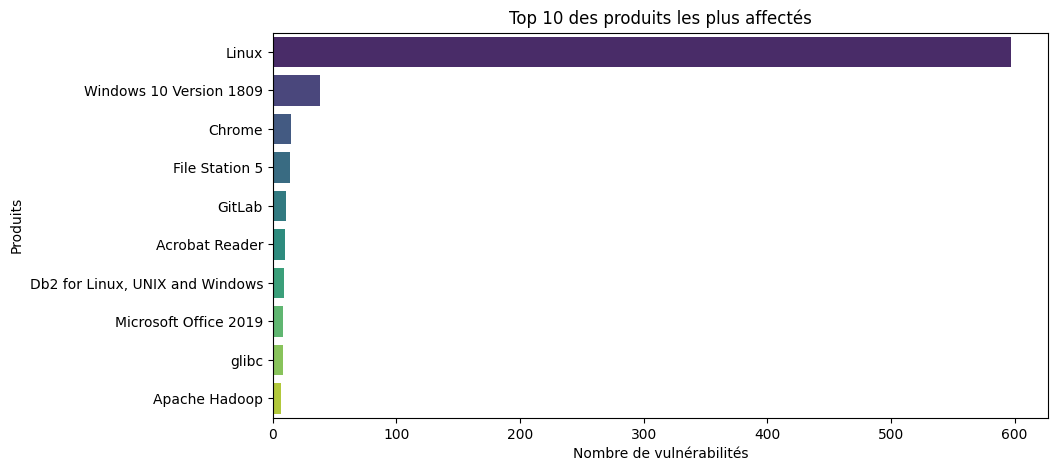

In [51]:
df_Produits = df.copy()
df_Produits = df_Produits.explode('Produit')
df_Produits = df_Produits[df_Produits['Produit'].notna() & (df_Produits['Produit'] != '') & (df_Produits['Produit'] != 'n/a')]

top_Produits = df_Produits['Produit'].value_counts().head(10)
top_Produits_df = top_Produits.reset_index()
top_Produits_df.columns = ['Produit', 'count']

plt.figure(figsize=(10,5))
sns.barplot(data=top_Produits_df, x='count', y='Produit', palette='viridis')
plt.title('Top 10 des produits les plus affectés')
plt.xlabel('Nombre de vulnérabilités')
plt.ylabel('Produits')
plt.show()



## 5. Nuage de points entre Score CVSS et Score EPSS

Corrélation linéaire CVSS / EPSS : 0.427


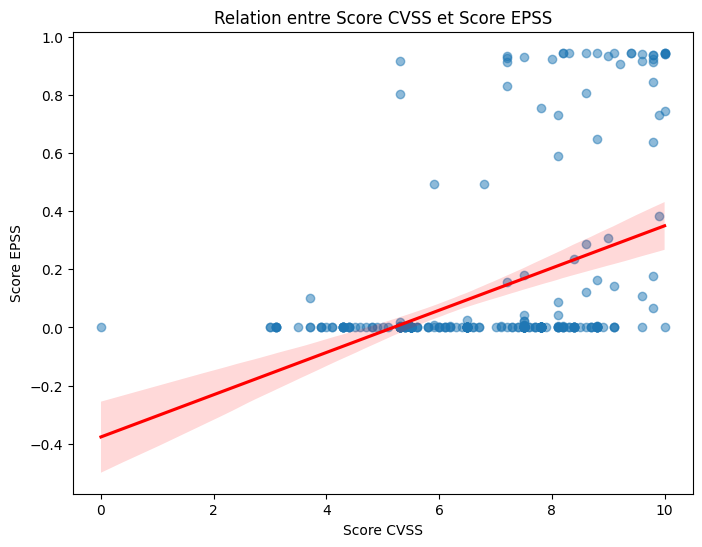

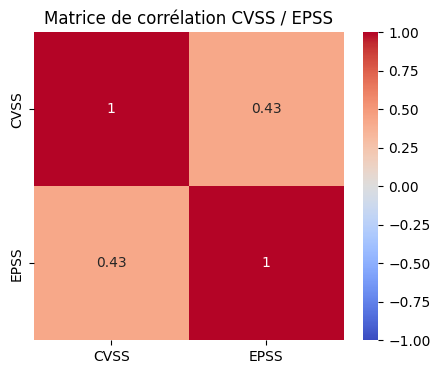

In [ ]:
# Analyse de l'impact du score CVSS sur le score EPSS

df_corr = df[['CVSS', 'EPSS', 'Base Severity']].dropna().copy()
df_corr['CVSS'] = df_corr['CVSS'].astype(float)
df_corr['EPSS'] = df_corr['EPSS'].astype(float)

correlation = df_corr['CVSS'].corr(df_corr['EPSS'])
print(f"Corrélation linéaire CVSS / EPSS : {correlation:.3f}")

plt.figure(figsize=(8,6))
sns.regplot(data=df_corr, x='CVSS', y='EPSS', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relation entre Score CVSS et Score EPSS')
plt.xlabel('Score CVSS')
plt.ylabel('Score EPSS')
plt.show()

plt.figure(figsize=(5,4))
corr_matrix = df_corr[['CVSS', 'EPSS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation CVSS / EPSS')
plt.show()

On remarque qu'un niveau de criticité (CVSS) bas implique une faible probabilité d'exploitation de la faille, mais au delà d'envrion 5/10 de criticité, il devient bien plus compliqué de faire un lien entre l'exploitabilité et le risque, étant donné que le CVSS et l'EPSS sont deux valeurs dépandantes de la faille en elle-même, et faiblement correlées. 

## 6. Courbe cumulative des vulnérabilités en fonction du temps (logarithmique)

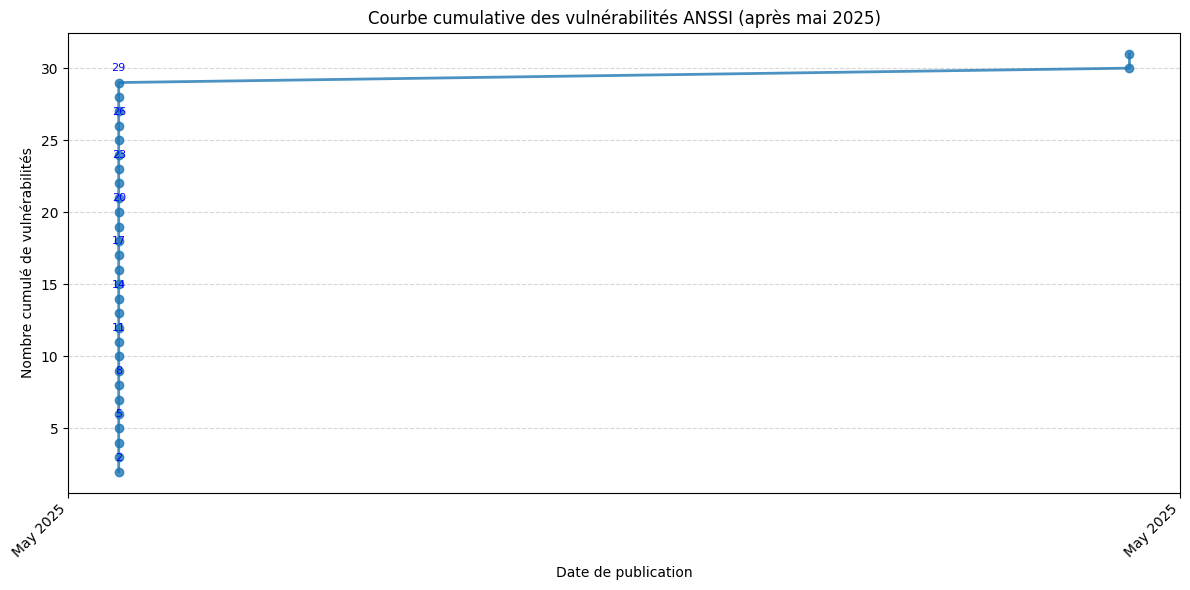

In [ ]:
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_sorted = df.sort_values('Date')
df_sorted = df_sorted[df_sorted['Date'].notna()]
df_sorted['cumulative'] = range(1, len(df_sorted)+1)


start_date = pd.Timestamp('2025-05-01')
if df_sorted['Date'].dt.tz is not None:
    start_date = start_date.tz_localize(df_sorted['Date'].dt.tz)
else:
    df_sorted['Date'] = df_sorted['Date'].dt.tz_localize(None)

df_plot = df_sorted[df_sorted['Date'] >= start_date]

plt.figure(figsize=(12,6))
plt.plot(df_plot['Date'].dt.tz_localize(None), df_plot['cumulative'], marker='o', linewidth=2, alpha=0.8)
plt.title("Courbe cumulative des vulnérabilités ANSSI (après mai 2025)")
plt.xlabel('Date de publication')
plt.ylabel('Nombre cumulé de vulnérabilités')
plt.grid(True, which='major', linestyle='--', alpha=0.5)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, ha='right')

for d, c in zip(df_plot['Date'][::max(1, len(df_plot)//8)], df_plot['cumulative'][::max(1, len(df_plot)//8)]):
    plt.annotate(f"{c}", (d, c), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8, color='blue')

plt.tight_layout()
plt.show()

## 7. Boxplot des scores CVSS par éditeur

C:\Users\maxim\AppData\Local\Temp\ipykernel_21044\2121361527.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


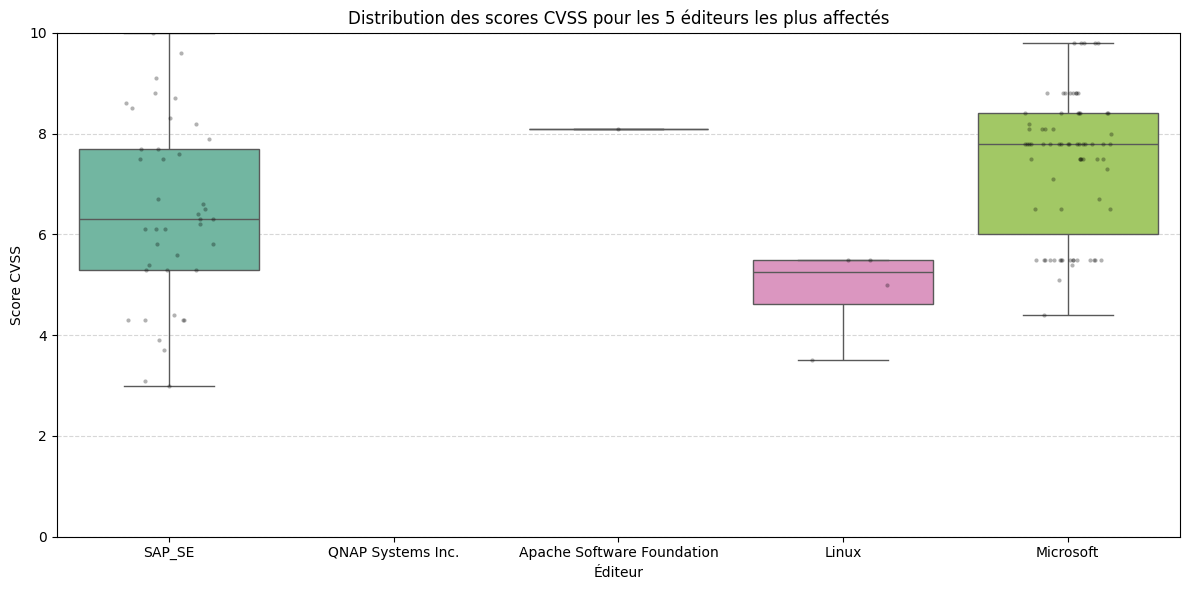

In [ ]:
df_vendor = df.copy()
df_vendor = df_vendor.explode('Éditeur')
df_vendor = df_vendor[df_vendor['Éditeur'].notna() & (df_vendor['Éditeur'] != '') & (df_vendor['Éditeur'] != 'n/a') & (df_vendor['Éditeur'] != 'Non disponible')]


df_vendor = df_vendor.drop_duplicates(subset=['CVE', 'Éditeur'])
df_vendor['CVSS'] = pd.to_numeric(df_vendor['CVSS'], errors='coerce')
top_editors = df_vendor['Éditeur'].value_counts().head(5).index

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_vendor[df_vendor['Éditeur'].isin(top_editors)],
    x='Éditeur',
    y='CVSS',
    palette='Set2'
)
sns.stripplot(
    data=df_vendor[df_vendor['Éditeur'].isin(top_editors)],
    x='Éditeur',
    y='CVSS',
    color='black',
    alpha=0.3,
    jitter=0.2,
    size=3
)
plt.title('Distribution des scores CVSS pour les 5 éditeurs les plus affectés')
plt.xlabel('Éditeur')
plt.ylabel('Score CVSS')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Ce graphe montre que les éditeurs de logiciel les plus concernés quantitativement ne sont pas pour autant forcément les plus en danger en termes de risque.

## Régression linéaire : prédiction du CVSS (supervisé)

comme dit précédement il est dur de prévoir avec l'EPSS le CVSS, cependant il reste des données exploités : 
- Type
- texte (titre, description)

#### type :
le type est binaire : avis ou alerte
On peut alors utilisé un hot-encoding, pour convertir en valuer numérique exploitable

#### texte : 
Pour le texte, nous allons utilisé une fonction de sci-kit learn : le tfidf (term frequency inverse document frequency)

cet outil permet de renvoyer une matrice 2d de la fréquence d'apparition des n premiers termes par rapport au texte complet. Cette matrice permet le titre et la description d'être considéré dans les paramètres du model de régression.

In [55]:
df_cleaned = df.dropna(subset=['CVSS', 'CVE', 'EPSS']).copy()

Évaluation classification (CVSS arrondi) :
  Accuracy : 0.3667
  Recall   : 0.3667
  F1-score : 0.4047


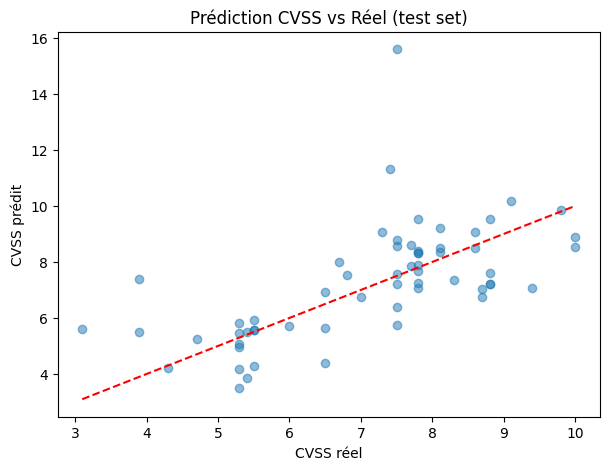

In [ ]:
# Régression pour prédire le score CVSS à partir des features numériques et TF-IDF (description et titre)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score

df_cleaned = df.dropna(subset=['CVSS', 'CVE', 'EPSS']).copy()

features = ['EPSS']
if 'Base Severity' in df_cleaned.columns:
    df_cleaned['severity_encoded'] = df_cleaned['Base Severity'].astype('category').cat.codes
    features.append('severity_encoded')

X_num = df_cleaned[features].fillna(0)

desc = df_cleaned['Description'].fillna('')
titre = df_cleaned['Titre ANSSI'].fillna('')

# vectorisation :
tfidf_desc = TfidfVectorizer(max_features=100)
tfidf_titre = TfidfVectorizer(max_features=50)

X_desc = tfidf_desc.fit_transform(desc)
X_titre = tfidf_titre.fit_transform(titre)

# Standardisation :
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Concaténer toutes les features (numériques + textuelles)
X_all = hstack([csr_matrix(X_num_scaled), X_desc, X_titre])

y = df_cleaned['CVSS'].astype(float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Modèle
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

y_test_class = y_test.round().astype(int)
y_pred_class = pd.Series(y_pred).round().astype(int)

# Évaluation classification
accuracy = accuracy_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class, average='weighted', zero_division=0)
f1 = f1_score(y_test_class, y_pred_class, average='weighted', zero_division=0)

print("Évaluation classification (CVSS arrondi) :")
print(f"  Accuracy : {accuracy:.4f}")
print(f"  Recall   : {recall:.4f}")
print(f"  F1-score : {f1:.4f}")

# Visualisation pred vs réel
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('CVSS réel')
plt.ylabel('CVSS prédit')
plt.title('Prédiction CVSS vs Réel (test set)')
plt.show()

## Clustering des vulnérabilités : Kmeans avec PCA (non-supervisés)

en refaisant les modification précédememnt sur notre data-set, on peut aussi extraire des cluster de différentes vulnérabilités

Répartition des vulnérabilités par cluster :
cluster
2    134
1    125
0     37
Name: count, dtype: int64


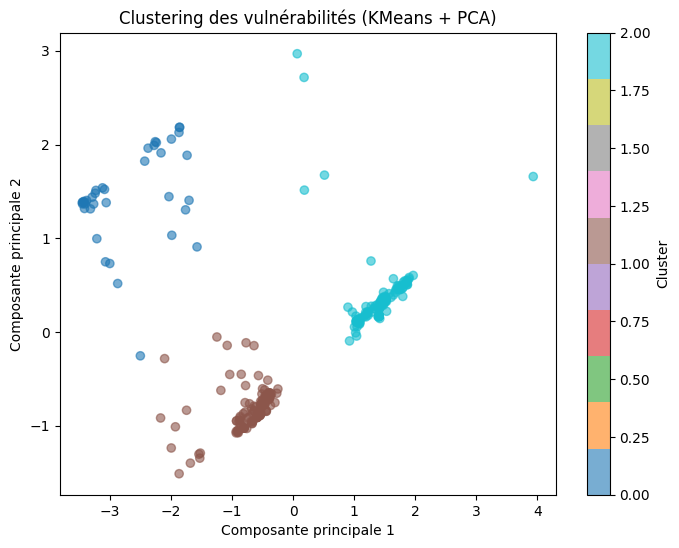

In [ ]:
# Clustering des vulnérabilités avec KMeans (features : EPSS, CVSS, severity_encoded, TF-IDF Description/Titre ANSSI)

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['CVSS', 'EPSS']
if 'Base Severity' in df_cleaned.columns:
    df_cleaned['severity_encoded'] = df_cleaned['Base Severity'].astype('category').cat.codes
    features.append('severity_encoded')

X_num = df_cleaned[features].fillna(0)


# vectorisation :
desc = df_cleaned['Description'].fillna('')
titre = df_cleaned['Titre ANSSI'].fillna('')
tfidf_desc = TfidfVectorizer(max_features=50)
tfidf_titre = TfidfVectorizer(max_features=30)

X_desc = tfidf_desc.fit_transform(desc)
X_titre = tfidf_titre.fit_transform(titre)

# Standardisation des features numériques
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# features :
X_all = hstack([csr_matrix(X_num_scaled), X_desc, X_titre])

# KMeans clustering k = 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_all)
df_cleaned['cluster'] = clusters

# Affichage de la répartition des clusters
print("Répartition des vulnérabilités par cluster :")
print(df_cleaned['cluster'].value_counts())

# Visualisation 2D avec PCA
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_all.toarray())

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_vis[:,0], X_vis[:,1], c=clusters, cmap='tab10', alpha=0.6)
plt.title('Clustering des vulnérabilités (KMeans + PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(scatter, label='Cluster')
plt.show()